In [3]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_graphviz
import xgboost as xgb
from xgboost import XGBRegressor
import time

# Review, prepare and split the dataset into two datasets: 70% training and 30% test

In [4]:

# read in the cleaned csv

df = pd.read_csv('train_data_2.2.csv')

df

,taxi_zone,datetime,passenger_count,year_month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0,2022-01,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,2022-01-01 01:00:00,0,2022-01,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2022-01-01 02:00:00,2,2022-01,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,2022-01-01 03:00:00,1,2022-01,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,2022-01-01 04:00:00,8,2022-01,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,2023-04-30 19:00:00,247,2023-04,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,2023-04-30 20:00:00,242,2023-04,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,2023-04-30 21:00:00,210,2023-04,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,2023-04-30 22:00:00,152,2023-04,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


In [5]:
df = df.drop('datetime', axis=1)
df

,taxi_zone,passenger_count,year_month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,0,2022-01,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,0,2022-01,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2,2022-01,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,1,2022-01,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,8,2022-01,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,247,2023-04,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,242,2023-04,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,210,2023-04,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,152,2023-04,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


In [6]:
df.dtypes

taxi_zone                           int64
passenger_count                     int64
year_month                         object
week                                int64
hour                                int64
borough                            object
entertainment_and_recreation        int64
financial_services                  int64
food_and_beverage                   int64
parking_and_automotive_services     int64
professional_services               int64
real_estate                         int64
retail_services                     int64
transportation                      int64
hospital                            int64
hotspots                            int64
school                              int64
total_business                      int64
holiday                            object
dtype: object

In [7]:
df['taxi_zone'] = df['taxi_zone'].astype('category')
df['year_month'] = df['year_month'].astype('category')
df['week'] = df['week'].astype('category')
df['hour'] = df['hour'].astype('category')
df['borough'] = df['borough'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df.dtypes

taxi_zone                          category
passenger_count                       int64
year_month                         category
week                               category
hour                               category
borough                            category
entertainment_and_recreation          int64
financial_services                    int64
food_and_beverage                     int64
parking_and_automotive_services       int64
professional_services                 int64
real_estate                           int64
retail_services                       int64
transportation                        int64
hospital                              int64
hotspots                              int64
school                                int64
total_business                        int64
holiday                            category
dtype: object

# set up dummies features

In [8]:
# set up dummies features
df = pd.get_dummies(df)
df.dtypes

passenger_count                      int64
entertainment_and_recreation         int64
financial_services                   int64
food_and_beverage                    int64
parking_and_automotive_services      int64
                                     ...  
holiday_New Year's Day (Observed)    uint8
holiday_No                           uint8
holiday_Thanksgiving                 uint8
holiday_Veterans Day                 uint8
holiday_Washington's Birthday        uint8
Length: 340, dtype: object

In [9]:
for col in df.columns:
    print(col)

passenger_count
entertainment_and_recreation
financial_services
food_and_beverage
parking_and_automotive_services
professional_services
real_estate
retail_services
transportation
hospital
hotspots
school
total_business
taxi_zone_1
taxi_zone_2
taxi_zone_3
taxi_zone_4
taxi_zone_5
taxi_zone_6
taxi_zone_7
taxi_zone_8
taxi_zone_9
taxi_zone_10
taxi_zone_11
taxi_zone_12
taxi_zone_13
taxi_zone_14
taxi_zone_15
taxi_zone_16
taxi_zone_17
taxi_zone_18
taxi_zone_19
taxi_zone_20
taxi_zone_21
taxi_zone_22
taxi_zone_23
taxi_zone_24
taxi_zone_25
taxi_zone_26
taxi_zone_27
taxi_zone_28
taxi_zone_29
taxi_zone_30
taxi_zone_31
taxi_zone_32
taxi_zone_33
taxi_zone_34
taxi_zone_35
taxi_zone_36
taxi_zone_37
taxi_zone_38
taxi_zone_39
taxi_zone_40
taxi_zone_41
taxi_zone_42
taxi_zone_43
taxi_zone_44
taxi_zone_45
taxi_zone_46
taxi_zone_47
taxi_zone_48
taxi_zone_49
taxi_zone_50
taxi_zone_51
taxi_zone_52
taxi_zone_53
taxi_zone_54
taxi_zone_55
taxi_zone_56
taxi_zone_57
taxi_zone_58
taxi_zone_59
taxi_zone_60
taxi_zone_

# Shuffle and split the dataset into two datasets: 70% training and 30% test

In [10]:
# shuffle the data
df = df.sample(frac=1, random_state=987)
print(df.head(5))

         passenger_count  entertainment_and_recreation  financial_services  \
228483                 0                             4                   2   
208468                 2                             0                  12   
2144853                3                             1                   2   
174233                 0                             3                   0   
1564157               13                            41                   0   

         food_and_beverage  parking_and_automotive_services  \
228483                   0                               17   
208468                   0                               10   
2144853                  0                               12   
174233                   0                                7   
1564157                  2                               29   

         professional_services  real_estate  retail_services  transportation  \
228483                      31           65               97            

In [11]:
# split data set to training data and test data
y = pd.DataFrame(df["passenger_count"])
X = df.drop(labels=["passenger_count"], axis=1)

# divide data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [12]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,26,5,0,11,19,43,106,9,0,63,...,0,0,0,0,0,0,1,0,0,0
1,6,1,0,24,12,393,202,2,0,29,...,0,0,0,0,0,0,1,0,0,0
2,0,2,0,7,6,10,60,0,0,4,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,30,0,10,27,4,0,15,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,5,6,29,66,0,0,4,...,0,0,0,0,0,0,1,0,0,0


# use XGboost regression

# adjust the depth of model

In [14]:


# Define a dictionary to store results
results = {}

# Loop over the range of max_depth values
for depth in range(6, 21, 2):
    
    # Record the start time
    start_time = time.time()
    
    # Instantiate the model with current max_depth
    xgb = XGBRegressor(n_estimators=100, max_depth=depth, learning_rate=0.1, random_state=1)
    

    # Fit the model
    xgb.fit(X_train, y_train)

    # Calculate and print the time taken
    time_taken = time.time() - start_time
    print(f"Time taken to fit the model with max_depth {depth}: {time_taken} seconds")

    # Predicted value for all examples
    xgb_predictions_train = xgb.predict(X_train).ravel()
    y_train_1d = y_train.values.ravel()

    # Calculate MAE, MSE and RMSE
    mae = metrics.mean_absolute_error(y_train_1d, xgb_predictions_train)
    mse = metrics.mean_squared_error(y_train_1d, xgb_predictions_train)
    rmse = np.sqrt(mse) # or mse**(0.5)

    print(f'For max_depth {depth}, Mean Absolute Error (MAE): {mae}')
    print(f'For max_depth {depth}, Mean Squared Error (MSE): {mse}')
    print(f'For max_depth {depth}, Root Mean Squared Error (RMSE): {rmse}')
    
    # Store the results
    results[depth] = {'Time': time_taken, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Display the results
for depth in results:
    print(f"For max_depth {depth}, Time: {results[depth]['Time']}, MAE: {results[depth]['MAE']}, MSE: {results[depth]['MSE']}, RMSE: {results[depth]['RMSE']}")


Time taken to fit the model with max_depth 6: 1321.2716298103333 seconds
For max_depth 6, Mean Absolute Error (MAE): 16.738036906421645
For max_depth 6, Mean Squared Error (MSE): 1888.4609826821695
For max_depth 6, Root Mean Squared Error (RMSE): 43.45642625299703
Time taken to fit the model with max_depth 8: 1637.3149819374084 seconds
For max_depth 8, Mean Absolute Error (MAE): 12.727954350240047
For max_depth 8, Mean Squared Error (MSE): 1113.6844371660752
For max_depth 8, Root Mean Squared Error (RMSE): 33.3719109007272
Time taken to fit the model with max_depth 10: 2137.012340784073 seconds
For max_depth 10, Mean Absolute Error (MAE): 10.387021839112053
For max_depth 10, Mean Squared Error (MSE): 763.1112130233478
For max_depth 10, Root Mean Squared Error (RMSE): 27.624467651401858
Time taken to fit the model with max_depth 12: 2501.4761810302734 seconds
For max_depth 12, Mean Absolute Error (MAE): 8.786000789088433
For max_depth 12, Mean Squared Error (MSE): 575.2611353255671
For 

In [21]:
# Define a dictionary to store results
results = {}

# Define range of hyperparameters
depth_range = [10, 14]
learning_rate_range = [0.1, 0.2]
n_estimators_range = [100, 200]

# Loop over the range of max_depth values, learning_rate, and n_estimators
for depth in depth_range:
    for learning_rate in learning_rate_range:
        for n_estimators in n_estimators_range:
            print("depth", depth, "learning_rate", learning_rate, "n_estimators_range", n_estimators)
    
            # Record the start time
            start_time = time.time()
            
            # Instantiate the model with current max_depth, learning_rate, and n_estimators
            xgb = XGBRegressor(n_estimators=n_estimators, max_depth=depth, learning_rate=learning_rate, random_state=1)

            # Fit the model
            xgb.fit(X_train, y_train)

            # Calculate and print the time taken
            time_taken = time.time() - start_time
            print(f"Time taken to fit the model with max_depth {depth}, learning_rate {learning_rate}, and n_estimators {n_estimators}: {time_taken} seconds")

            # Predicted value for all examples
            xgb_predictions_train = xgb.predict(X_train).ravel()
            y_train_1d = y_train.values.ravel()
            xgb_predictions_test = xgb.predict(X_test).ravel()
            y_test_1d = y_test.values.ravel()

            # Calculate MAE, MSE and RMSE for train data
            train_mae = metrics.mean_absolute_error(y_train_1d, xgb_predictions_train)
            train_mse = metrics.mean_squared_error(y_train_1d, xgb_predictions_train)
            train_rmse = np.sqrt(train_mse) 

            # Calculate MAE, MSE and RMSE for test data
            test_mae = metrics.mean_absolute_error(y_test_1d, xgb_predictions_test)
            test_mse = metrics.mean_squared_error(y_test_1d, xgb_predictions_test)
            test_rmse = np.sqrt(test_mse)
            
            
            print("==================== Test Data =======================")
            print('Mean Absolute Error (MAE):', test_mae)
            print('Mean Squared Error (MSE):', test_mse)
            print('Root Mean Squared Error (RMSE):', test_rmse)

            print("==================== Train Data =======================")
            print('Mean Absolute Error (MAE):', mae)
            print('Mean Squared Error (MSE):', mse)
            print('Root Mean Squared Error (RMSE):', rmse)

            # Store the results
            results[(depth, learning_rate, n_estimators)] = {'Train Time': time_taken, 'Train MAE': train_mae, 'Train MSE': train_mse, 'Train RMSE': train_rmse,
                                                             'Test MAE': test_mae, 'Test MSE': test_mse, 'Test RMSE': test_rmse}

# Display the results
for key in results:
    print(f"For max_depth {key[0]}, learning_rate {key[1]}, and n_estimators {key[2]}, Train Time: {results[key]['Train Time']}, Train MAE: {results[key]['Train MAE']}, Train MSE: {results[key]['Train MSE']}, Train RMSE: {results[key]['Train RMSE']}, Test MAE: {results[key]['Test MAE']}, Test MSE: {results[key]['Test MSE']}, Test RMSE: {results[key]['Test RMSE']}")


depth 10 learning_rate 0.1 n_estimators_range 100
Time taken to fit the model with max_depth 10, learning_rate 0.1, and n_estimators 100: 2201.7272758483887 seconds
==================== Test Data =======================
Mean Absolute Error (MAE): 10.61809982812499
Mean Squared Error (MSE): 815.6985620458381
Root Mean Squared Error (RMSE): 28.560437007263005
==================== Train Data =======================
Mean Absolute Error (MAE): 5.777475064533428
Mean Squared Error (MSE): 283.95504370962925
Root Mean Squared Error (RMSE): 16.850965661042373
depth 10 learning_rate 0.1 n_estimators_range 200
Time taken to fit the model with max_depth 10, learning_rate 0.1, and n_estimators 200: 4240.583539009094 seconds
==================== Test Data =======================
Mean Absolute Error (MAE): 9.542064671062041
Mean Squared Error (MSE): 669.6441304601423
Root Mean Squared Error (RMSE): 25.877483078153915
==================== Train Data =======================
Mean Absolute Error (MAE): 5

In [14]:
import pickle

# Define a dictionary to store results
results = {}

# Define range of hyperparameters
depth_range = [10, 14]
learning_rate_range = [0.1, 0.2]
n_estimators_range = [100, 200]

# Loop over the range of max_depth values, learning_rate, and n_estimators
for depth in depth_range:
    for learning_rate in learning_rate_range:
        for n_estimators in n_estimators_range:
            print("depth", depth, "learning_rate", learning_rate, "n_estimators_range", n_estimators)
    
            # Record the start time
            start_time = time.time()
            
            # Instantiate the model with current max_depth, learning_rate, and n_estimators
            xgb = XGBRegressor(n_estimators=n_estimators, max_depth=depth, learning_rate=learning_rate, random_state=1)

            # Fit the model
            xgb.fit(X_train, y_train)

            # Calculate and print the time taken
            time_taken = time.time() - start_time
            print(f"Time taken to fit the model with max_depth {depth}, learning_rate {learning_rate}, and n_estimators {n_estimators}: {time_taken} seconds")
            
            

            # save the model to disk
            filename = 'XGboost_model_' + str(depth) + '_' + str(learning_rate) + '_' + str(n_estimators) + '.pkl'

            pickle.dump(xgb, open(filename, 'wb'))

#             # Predicted value for all examples
#             xgb_predictions_train = xgb.predict(X_train).ravel()
#             y_train_1d = y_train.values.ravel()
#             xgb_predictions_test = xgb.predict(X_test).ravel()
#             y_test_1d = y_test.values.ravel()

#             # Calculate MAE, MSE and RMSE for train data
#             train_mae = metrics.mean_absolute_error(y_train_1d, xgb_predictions_train)
#             train_mse = metrics.mean_squared_error(y_train_1d, xgb_predictions_train)
#             train_rmse = np.sqrt(train_mse) 
            
#             # Calculate MAPE
#             epsilon = 1  # Small constant to avoid division by zero
#             train_mape = np.mean(np.abs((y_train_1d['Actual'] - xgb_predictions_train['Predicted']) / (y_train_1d['Actual'] + epsilon))) * 100

#             # Calculate MAE, MSE and RMSE for test data
#             test_mae = metrics.mean_absolute_error(y_test_1d, xgb_predictions_test)
#             test_mse = metrics.mean_squared_error(y_test_1d, xgb_predictions_test)
#             test_rmse = np.sqrt(test_mse)
#             test_mape = np.mean(np.abs((y_test_1d['Actual'] - xgb_predictions_test['Predicted']) / (xgb_predictions_test['Actual'] + epsilon))) * 100
            
            
#             print("==================== Test Data =======================")
#             print('Mean Absolute Error (MAE):', test_mae)
#             print('Mean Squared Error (MSE):', test_mse)
#             print('Root Mean Squared Error (RMSE):', test_rmse)
#             print('Mean Absolute Percentage Error (MAPE):', test_mape, '%')

#             print("==================== Train Data =======================")
#             print('Mean Absolute Error (MAE):', train_mae)
#             print('Mean Squared Error (MSE):', train_mse)
#             print('Root Mean Squared Error (RMSE):', train_rmse)
#             print('Mean Absolute Percentage Error (MAPE):', train_mape, '%')

#             # Store the results
#             results[(depth, learning_rate, n_estimators)] = {'Train Time': time_taken, 'Train MAE': train_mae, 'Train MSE': train_mse, 'Train RMSE': train_rmse,
#                                                              'Test MAE': test_mae, 'Test MSE': test_mse, 'Test RMSE': test_rmse}

# # Display the results
# for key in results:
#     print(f"For max_depth {key[0]}, learning_rate {key[1]}, and n_estimators {key[2]}, Train Time: {results[key]['Train Time']}, Train MAE: {results[key]['Train MAE']}, Train MSE: {results[key]['Train MSE']}, Train RMSE: {results[key]['Train RMSE']}, Test MAE: {results[key]['Test MAE']}, Test MSE: {results[key]['Test MSE']}, Test RMSE: {results[key]['Test RMSE']}")


depth 10 learning_rate 0.1 n_estimators_range 100
Time taken to fit the model with max_depth 10, learning_rate 0.1, and n_estimators 100: 1478.342031955719 seconds
depth 10 learning_rate 0.1 n_estimators_range 200
Time taken to fit the model with max_depth 10, learning_rate 0.1, and n_estimators 200: 2996.7621669769287 seconds
depth 10 learning_rate 0.2 n_estimators_range 100
Time taken to fit the model with max_depth 10, learning_rate 0.2, and n_estimators 100: 1649.95085811615 seconds
depth 10 learning_rate 0.2 n_estimators_range 200
Time taken to fit the model with max_depth 10, learning_rate 0.2, and n_estimators 200: 13567.771003961563 seconds
depth 14 learning_rate 0.1 n_estimators_range 100
Time taken to fit the model with max_depth 14, learning_rate 0.1, and n_estimators 100: 2384.209722995758 seconds
depth 14 learning_rate 0.1 n_estimators_range 200
Time taken to fit the model with max_depth 14, learning_rate 0.1, and n_estimators 200: 33709.05953383446 seconds
depth 14 learni

In [32]:

# instantiate the model
xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=1)

# record the start time
start_time = time.time()

# fit the model
xgb.fit(X_train, y_train)

# calculate and print the time taken
time_taken = time.time() - start_time
print(f"Time taken to fit the model: {time_taken} seconds")

Time taken to fit the model: 2640.0415182113647 seconds


# Print the predicted target feature value¶

In [33]:
# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_train = xgb.predict(X_train).ravel()
y_train_1d = y_train.values.ravel()

df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': xgb_predictions_train})
df_true_vs_xgb_predicted.head(100)


,Actual,Predicted
0,19,41.729946
1,4,6.692019
2,0,1.560157
3,155,233.145828
4,0,0.859631
...,...,...
95,3,7.922063
96,2,2.861925
97,21,15.718729
98,0,0.881492


In [34]:
# Calculate MAE, MSE and RMSE
mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
rmse = np.sqrt(mse) # or mse**(0.5)  

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 10.387021839112053
Mean Squared Error (MSE): 763.1112130233478
Root Mean Squared Error (RMSE): 27.624467651401858


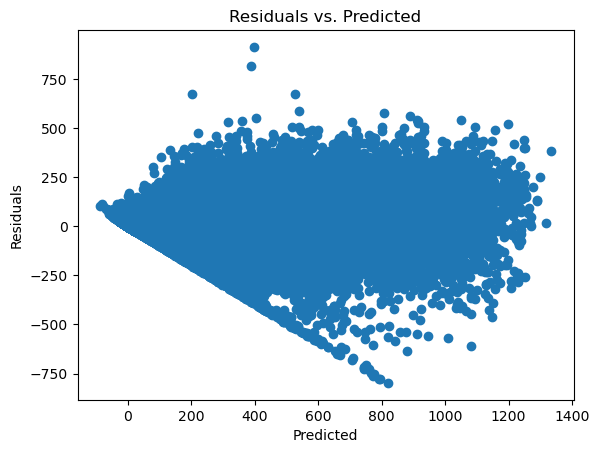

In [35]:
# Convert to DataFrame
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
xgb_predictions_train_df = pd.DataFrame(xgb_predictions_train, columns=['Predicted']).reset_index(drop=True)

# Calculate residuals
residuals = y_train_df['passenger_count'] - xgb_predictions_train_df['Predicted']

# Plot residuals
plt.scatter(xgb_predictions_train_df, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


In [36]:
# plt.hist(residuals, bins=20)
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.title('Distribution of Residuals')
# plt.show()

In [37]:
print(len(y_train))
print(len(xgb_predictions_train))


2126628
2126628


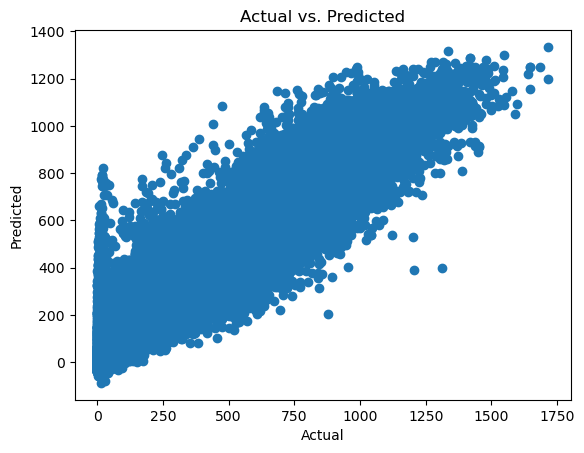

In [38]:
plt.scatter(y_train, xgb_predictions_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


# Evaluate the model using the hold-out (30% examples) test set

In [39]:

# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_test = xgb.predict(X_test).ravel()
y_test_1d = y_test.values.ravel()

df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_test_1d, 'Predicted': xgb_predictions_test})
df_true_vs_xgb_predicted.head(20)


,Actual,Predicted
0,2,1.411237
1,7,12.107876
2,44,59.079605
3,1,2.670710
4,383,398.046753
5,0,0.545680
6,232,196.706909
7,0,0.543731
8,0,2.464181
9,106,154.733383


In [40]:
# Calculate MAE, MSE and RMSE
test_mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_rmse = np.sqrt(mse) # or mse**(0.5) 
print("==================== Test Data =======================")
print('Mean Absolute Error (MAE):', test_mae)
print('Mean Squared Error (MSE):', test_mse)
print('Root Mean Squared Error (RMSE):', test_rmse)

print("==================== Train Data =======================")
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

==================== Test Data =======================
Mean Absolute Error (MAE): 10.61809982812499
Mean Squared Error (MSE): 815.6985620458381
Root Mean Squared Error (RMSE): 27.624467651401858
==================== Train Data =======================
Mean Absolute Error (MAE): 10.387021839112053
Mean Squared Error (MSE): 763.1112130233478
Root Mean Squared Error (RMSE): 27.624467651401858


In [41]:
import pickle

# save the model to disk
filename = 'basic_XGboost_model_2.2.pkl'
pickle.dump(xgb, open(filename, 'wb'))